In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LEY DE DARCY

Describe el movimiento de un fluido a través de un medio poroso.

$
\vec v = -\frac{k}{\mu L} \Delta P
$

Donde, <br>
$k$: es la permeabilidad del medio ($m^2$) <br>
$\mu$: la viscosidad del fluido ($Pa*s$) <br>
$\Delta P$: la caída de presión ($Pa$) <br>
$L$: longitud del medio poroso ($m$) <br>
$\vec v$: velocidad del fluido ($\frac{m}{s}$)

In [2]:
PropiedadesAgua = {"Temperatura":[0,5,10,15,20,25,30,40,50,60,70,80,90,100], 
                   "Densidad":[999.8,1000,999.7,999.1,998.2,997,995.7,992.2,
                               988,983.2,977.8,971.8,965.3,958.4], 
                   "ViscosidadDim":[1.781e-3, 1.518e-3, 1.307e-3, 1.139e-3, 
                                    1.002e-3, 0.890e-3, 0.798e-3, 0.653e-3, 
                                    0.547e-3, 0.466e-3, 0.404e-3, 0.354e-3, 
                                    0.315e-3, 0.282e-3], 
                   "ViscosidadCin":[1.785e-6, 1.519e-6, 1.306e-6, 1.140e-6, 
                                    1.003e-6, 0.893e-6, 0.8e-6, 0.658e-6, 
                                    0.553e-6, 0.474e-6, 0.413e-6, 0.364e-6, 
                                    0.326e-6, 0.294e-6]}
PropiedadesAgua = pd.DataFrame(PropiedadesAgua,)
PropiedadesAgua = PropiedadesAgua.set_index(PropiedadesAgua["Temperatura"])
PropiedadesAgua

,Temperatura,Densidad,ViscosidadDim,ViscosidadCin
Temperatura,,,,
0,0,999.8,0.001781,1.785000e-06
5,5,1000.0,0.001518,1.519000e-06
10,10,999.7,0.001307,1.306000e-06
15,15,999.1,0.001139,1.140000e-06
20,20,998.2,0.001002,1.003000e-06
25,25,997.0,0.000890,8.930000e-07
30,30,995.7,0.000798,8.000000e-07
40,40,992.2,0.000653,6.580000e-07
50,50,988.0,0.000547,5.530000e-07


## Evaluemos el efecto de la viscosidad en la velocidad del fluido para diferentes conductividades

In [3]:
k_grava_cm2 = np.linspace(10e-3,10e-6,10) #cm2
k_arena_limpia_cm2 = np.linspace(10e-9,10e-5,10) #cm2
k_arena_seca_cm2 = np.linspace(10e-10,10e-6,10) #cm2
k_limo_cm2 = np.linspace(10e-12, 10e-8,10) #cm2

In [4]:
k_grava_ms = np.linspace(10e-3,1,10) #m/s
k_arena_limpia_ms = np.linspace(10e-6,10e-2,10) #m/s
k_arena_seca_ms = np.linspace(10e-7,10e-3,10) #m/s
k_limo_ms = np.linspace(10e-9, 10e-5,10) #m/s

In [5]:
def darcy_viscosidad_efecto(mu, L, dP, k):
    for i in range(len(k)):
        v = (-k[i]*dP)/(mu*L)
        plt.plot(mu,v, label= np.round(k[i],10))
        plt.xlabel("Viscosidad dinamica (Pa*s)")
        plt.ylabel("Velocidad del fluido (m/s)")
        plt.legend(title="Permeabilidad ($m^2$)")

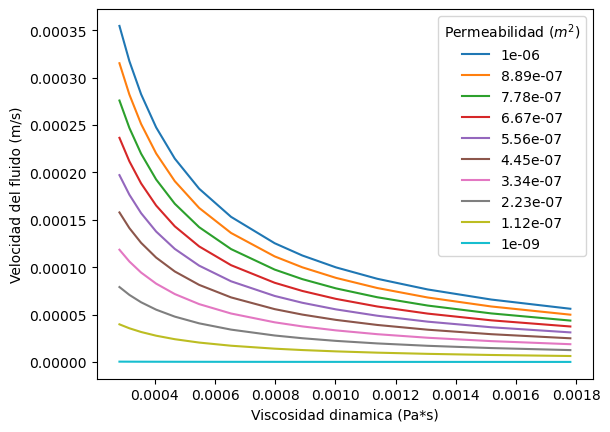

In [6]:
darcy_viscosidad_efecto(PropiedadesAgua["ViscosidadDim"], 1, -0.1, k_grava_cm2/10000)

## Evaluemos el efecto de la perdida de presion en la velocidad del fluido para diferentes conductividades

In [7]:
def darcy_presion_efecto(mu, L, dP, k):
    for i in range(len(k)):
        v = (-k[i]*dP)/(mu*L)
        plt.plot(dP,v, label= np.round(k[i],10))
        plt.xlabel("Perdida de presion (Pa)")
        plt.ylabel("Velocidad del fluido (m/s)")
        plt.legend(title="Permeabilidad ($m^2$)")

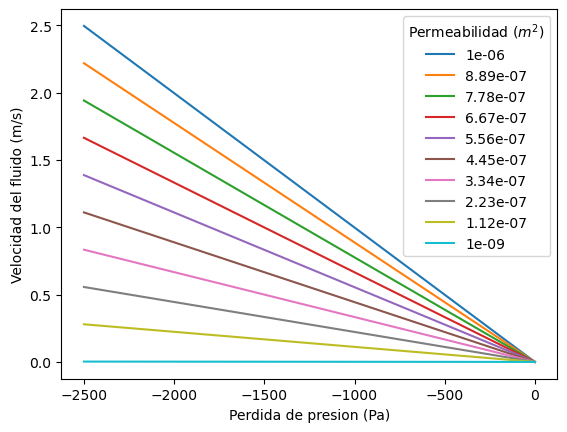

In [8]:
darcy_presion_efecto(0.001002, 1, np.linspace(-2500,-0.1,10), k_grava_cm2/10000)

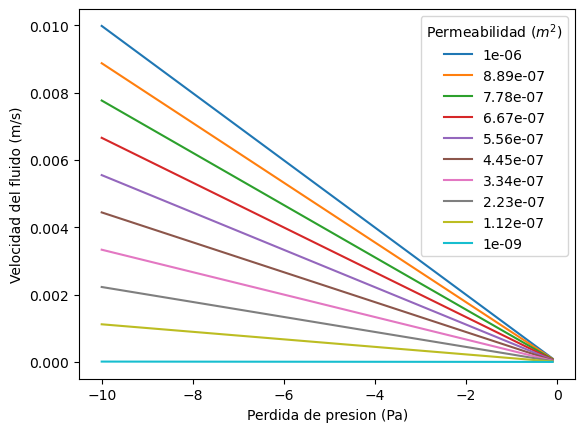

In [9]:
darcy_presion_efecto(0.001002, 1, np.linspace(-10,-0.1,10), k_grava_cm2/10000)

## Evaluemos el efecto de la longitud en la velocidad del fluido para diferentes conductividades

In [10]:
def darcy_longitud_efecto(mu, L, dP, k):
    for i in range(len(k)):
        v = (-k[i]*dP)/(mu*L)
        plt.plot(L,v, label= np.round(k[i],10))
        plt.xlabel("Longitud (m)")
        plt.ylabel("Velocidad del fluido (m/s)")
        plt.legend(title="Permeabilidad ($m^2$)")

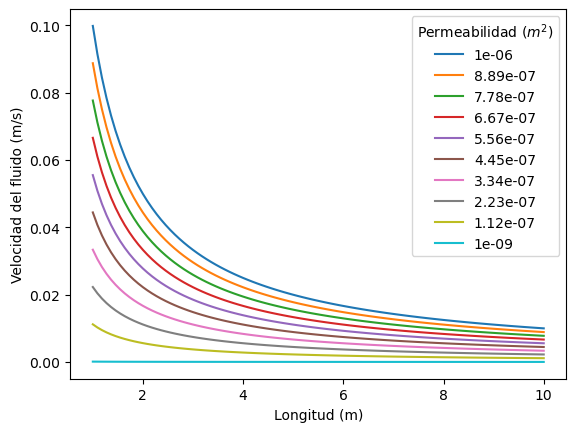

In [11]:
darcy_longitud_efecto(0.001002, np.linspace(1,10,100), -100, k_grava_cm2/10000)

## Otras formas de expezar la ecuación de Darcy

$
\vec v = -k \frac{\Delta P}{\mu * L}
$

$
P = \rho * g * dh
$

$
\vec v = -k* \upsilon^{-1} * g \frac{\Delta h}{\mu * L}
$

$
\vec v = -k^{'} \frac{\Delta h}{\mu * L}
$

$\upsilon$: viscosidad cinemática ($\frac{m^2}{s}$)<br>
$k^{'}$: permeabilidad (m/s)<br>
$\Delta h$: perdida de altura (m)


# Ecuación de Kozeny–Carman

$
\frac{\Delta P}{L} = -\frac{180 *\mu *(1-\in)^2 * \vec v}{\phi^2 * D_{p}^2 * \in^3}
$

Donde,<br>
$\in$: porosidad del lecho <br>
$\phi$: grado de esfericidad

$
\in = \frac{V_{agua}}{V_{total}} = \frac{V_{total}-V_{arena}}{V_{total}}
$

## Comparemos $\frac{\Delta P}{L}$ en Darcy y en Kozeny-Carman

In [12]:
def Comparacion_presiones(mu, k, vel, e, dp,phi):
    for i in range(len(vel)):
        dPdL_darcy = -vel[i]*mu/k
        dPdL_kozeny = -(180*mu*((1-e)**2) *vel[i])/((phi**2) * (dp**2) * (e**3))
        plt.plot(mu,dPdL_darcy, label=np.round(vel[i],3))
        plt.plot(mu,dPdL_kozeny, linestyle="dotted")
        plt.ylabel("dP/dL")
        plt.xlabel("$\mu$")
        plt.legend(title="velocidad")

Condiciones: k= $10^{-3}$, viscosidades para temperaturas de 0 a 100°C, velocidades para 0.01 a 2.5 $\frac{m}{s}$, porosidad de 0.1, diámetro de partícula de 0.001m y esfericidad de 1.

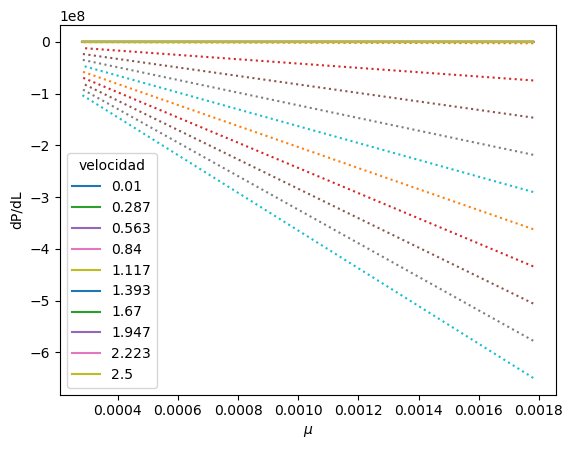

In [13]:
Comparacion_presiones(PropiedadesAgua["ViscosidadDim"], (10e-3)/10000, np.linspace(0.01,2.5,10), 
0.1, 0.001,1)

Acotemos las velocidades

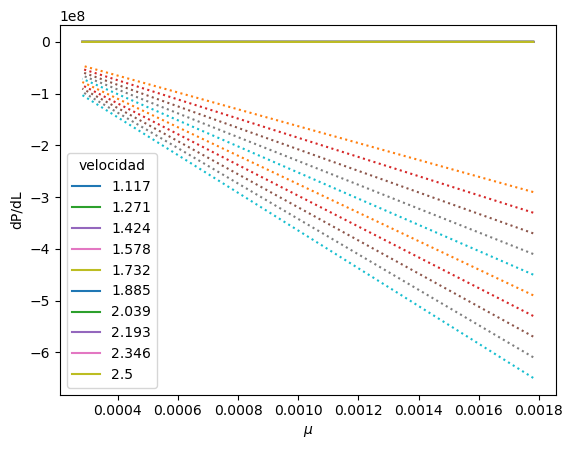

In [14]:
Comparacion_presiones(PropiedadesAgua["ViscosidadDim"], (10e-3)/10000, np.linspace(1.117,2.5,10), 
0.1, 0.001,1)

Modifiquemos la porosidad a 0.4

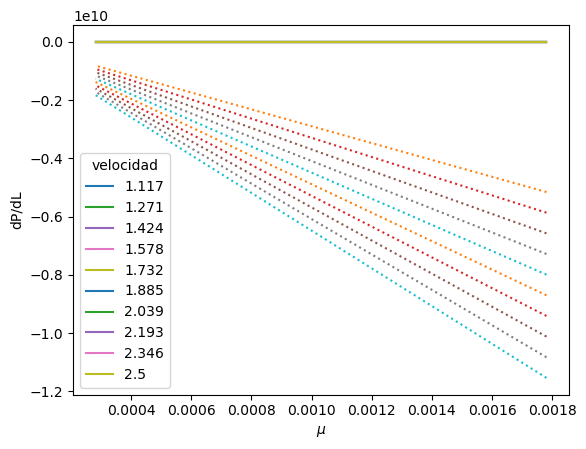

In [15]:
Comparacion_presiones(PropiedadesAgua["ViscosidadDim"], (10e-3)/10000, np.linspace(1.117,2.5,10), 
0.04, 0.001,1)

Modifiquemos el diámetro de partícula y la porosidad a 0.6 y 0.01 m

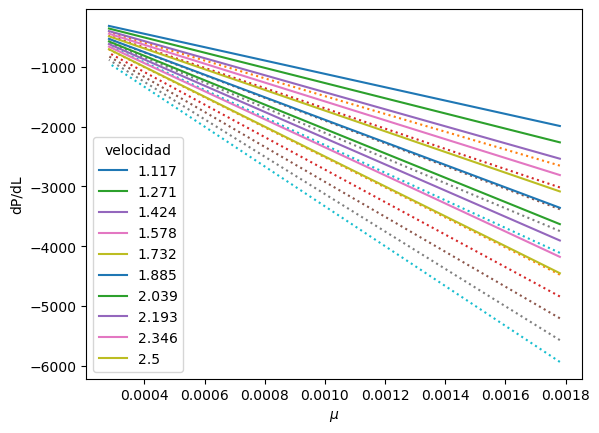

In [16]:
Comparacion_presiones(PropiedadesAgua["ViscosidadDim"], (10e-3)/10000, np.linspace(1.117,2.5,10), 
0.6, 0.01,1)

Al observar este ajuste de parámetros vemos que dos factores críticos del cambio de presión y que influyen en la velocidad son la porosidad y el tamaño de la partícula. Estos estan asociados a una permeabilidad para cada caso.

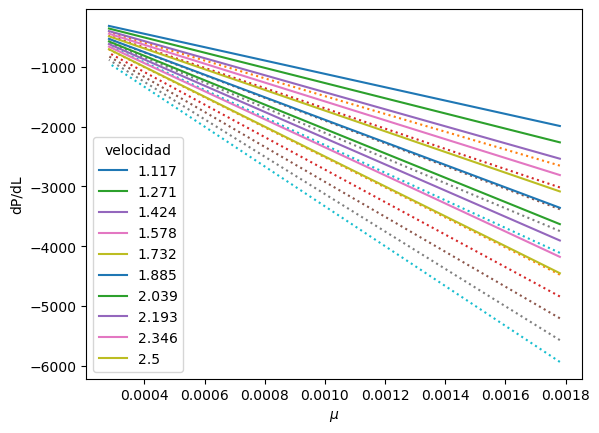

In [17]:
Comparacion_presiones(PropiedadesAgua["ViscosidadDim"], (10e-3)/10000, np.linspace(1.117,2.5,10), 
0.6, 0.01,1)

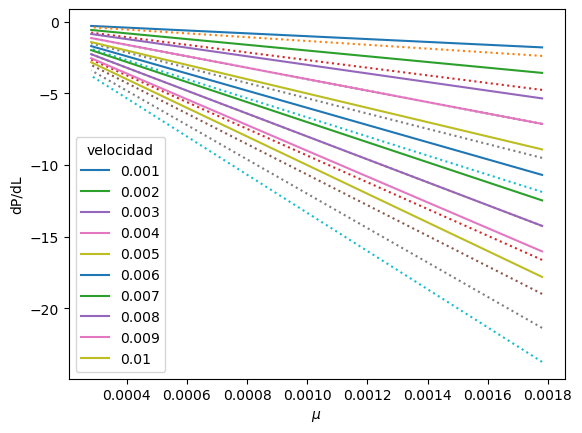

In [18]:
Comparacion_presiones(PropiedadesAgua["ViscosidadDim"], (10e-3)/10000, np.linspace(0.001,0.01,10), 
0.6, 0.01,1)

## Unifiquemos  Darcy y en Kozeny-Carman en $\vec v$ y en $\frac{\Delta P}{L}$ 

$
\frac{\Delta P}{L} = -\frac{180 *\mu *(1-\in)^2 * \vec v}{\phi^2 * D_{p}^2 * \in^3}
$

$
\vec v = -k \frac{\Delta P}{\mu * L}
$

$
\frac{\Delta P}{L} = -\frac{\vec v * \mu}{k}
$

$
-\frac{\vec v * \mu}{k} = -\frac{180 *\mu *(1-\in)^2 * \vec v}{\phi^2 * D_{p}^2 * \in^3}
$

$
k = \frac{\phi^2 * D_{p}^2 * \in^3}{180 *(1-\in)^2 }
$

$
\frac{\Delta P}{L} = -\frac{180 *\mu *(1-\in)^2 }{\phi^2 * D_{p}^2 * \in^3} * -k \frac{\Delta P}{\mu * L}
$

$
k = \frac{\phi^2 * D_{p}^2 * \in^3}{180 *(1-\in)^2 }
$

In [19]:
def k_estimada(phi,dp,e):
    for i in range(len(e)):
        k = ((phi**2) * (dp**2) * (e[i]**3)) / (180 * (1-e[i])**2)
        plt.plot(dp, k, label=np.round(e[i],3))
        plt.ylabel("k ($m^2$)")
        plt.xlabel("Diámetro de partícula ($m^2$)")
        plt.legend(title="porosidad")

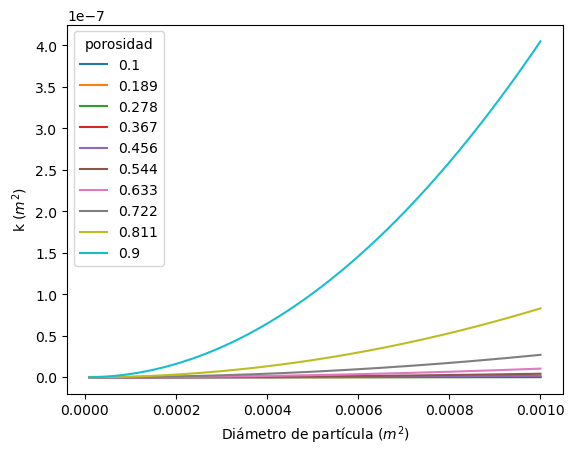

In [20]:
k_estimada(1,np.linspace(0.00001,0.001,1000),np.linspace(0.1,0.9,10))

Ajustemos al modelo anterior

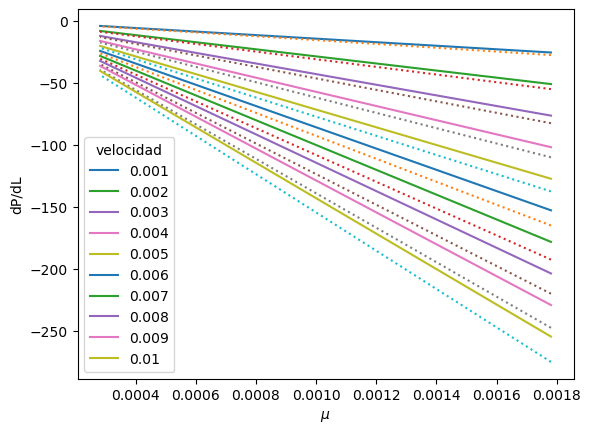

In [21]:
Comparacion_presiones(PropiedadesAgua["ViscosidadDim"], 0.7e-7, np.linspace(0.001,0.01,10), 
0.9, 0.0004,1)

# AHORA, CON ESTOS DATOS COMPARE LA PERDIDA DE PRESIÓN

In [22]:
VEL= 0.01

In [23]:
K = 0.5E-7

In [24]:
Poro = 0.9

In [25]:
DP = 0.00035

In [26]:
dPdL_Darcy = -VEL*PropiedadesAgua["ViscosidadDim"]/K

In [27]:
ESF= 1

In [28]:
dPdL_Kozeny = -(180*PropiedadesAgua["ViscosidadDim"]*((1-0.9)**2) * VEL)/((ESF**2)*(DP**2) * (Poro**2))

Text(0.5, 0, 'dP/dL,  Kozeny')

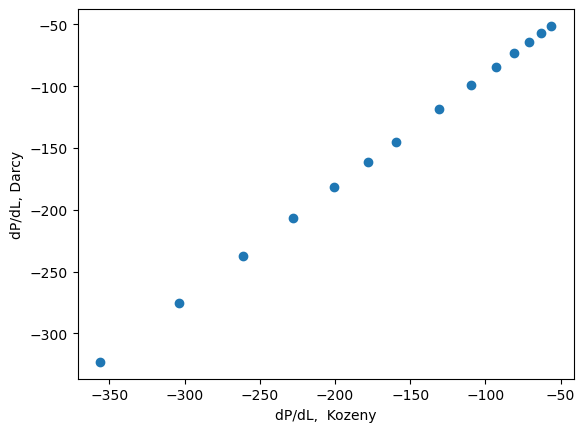

In [29]:
plt.scatter(dPdL_Darcy,dPdL_Kozeny)
plt.ylabel("dP/dL, Darcy")
plt.xlabel("dP/dL,  Kozeny")

# CON BASE EN LO VISTO EN CLASES DESARROLLE UN MODELO QUE EVALUÉ LOS EFECTOS DE LA LONGITUD DEL FILTRO